# **Machine Learning Final Project**


### Ron Keinan 203735857






____________________________________________________________________________________________________________________________________________________________________________________

Notebook # 1 - In this notebook I will create the DATA, prepare it and try different Classification methods on a balanced df with 2 labels to classify. it is the most easiest mission in the project.

## Introduction:

As part of the graduation project of the Machine Learning course,
I will carry out a research project in the field of health communities.
A database containing various Hebrew texts of health forums will be selected, and we will try to classify the medical community to which the texts belong.

I wanted to try a different approach to machine learning - which uses the texts themselves as features for prediction and not metadata.
I also wanted to compare all the methods taught in the course and see which one is the best and in which cases.

____________________________________________________________________________________________________________________________________________________________________________________

##### **The Camoni health communites website**

Camoni is a unique non-profit social network and the first of its kind in Israel, aimed to empower patients with chronic diseases and their family members.

Camoni is part of a growing global network of digital tools availing users with professional knowledge and advice together with social network access in order to facilitate problem solving, emotional support and sharing. The platform provides a variety of social and professional tools for coping with chronic health conditions, among them reliable, professional content, conversation walls, groups for counseling and sharing, blogs, medical news and updates, and healthcare professionals who voluntarily contribute time to lead the various communities and provide counselling to patients with chronic diseases and their families.

Among the many communities using the Camoni platform today are patients with Type-1 and Type-2 diabetes, heart diseases, pain, obesity, stroke, hypertension, attention deficit disorders, kidney disease, eating disorders, multiple sclerosis, spinal disorders, respiratory disorders, Crohn’s disease and colitis, depression and anxiety disorders, osteoporosis, war and terrorist attack-related post-traumatic disorders, hyperactive bladder disorders, psoriasis, joint disorders, breast cancer, Sjogren’s syndrome, ovarian cancer, colon cancer and multiple myeloma.

The website was established in 2009 by Prof. Mordechai Sani and the Gertner Institute - a national research institute for the study of epidemiology & health policy research in Israel. 

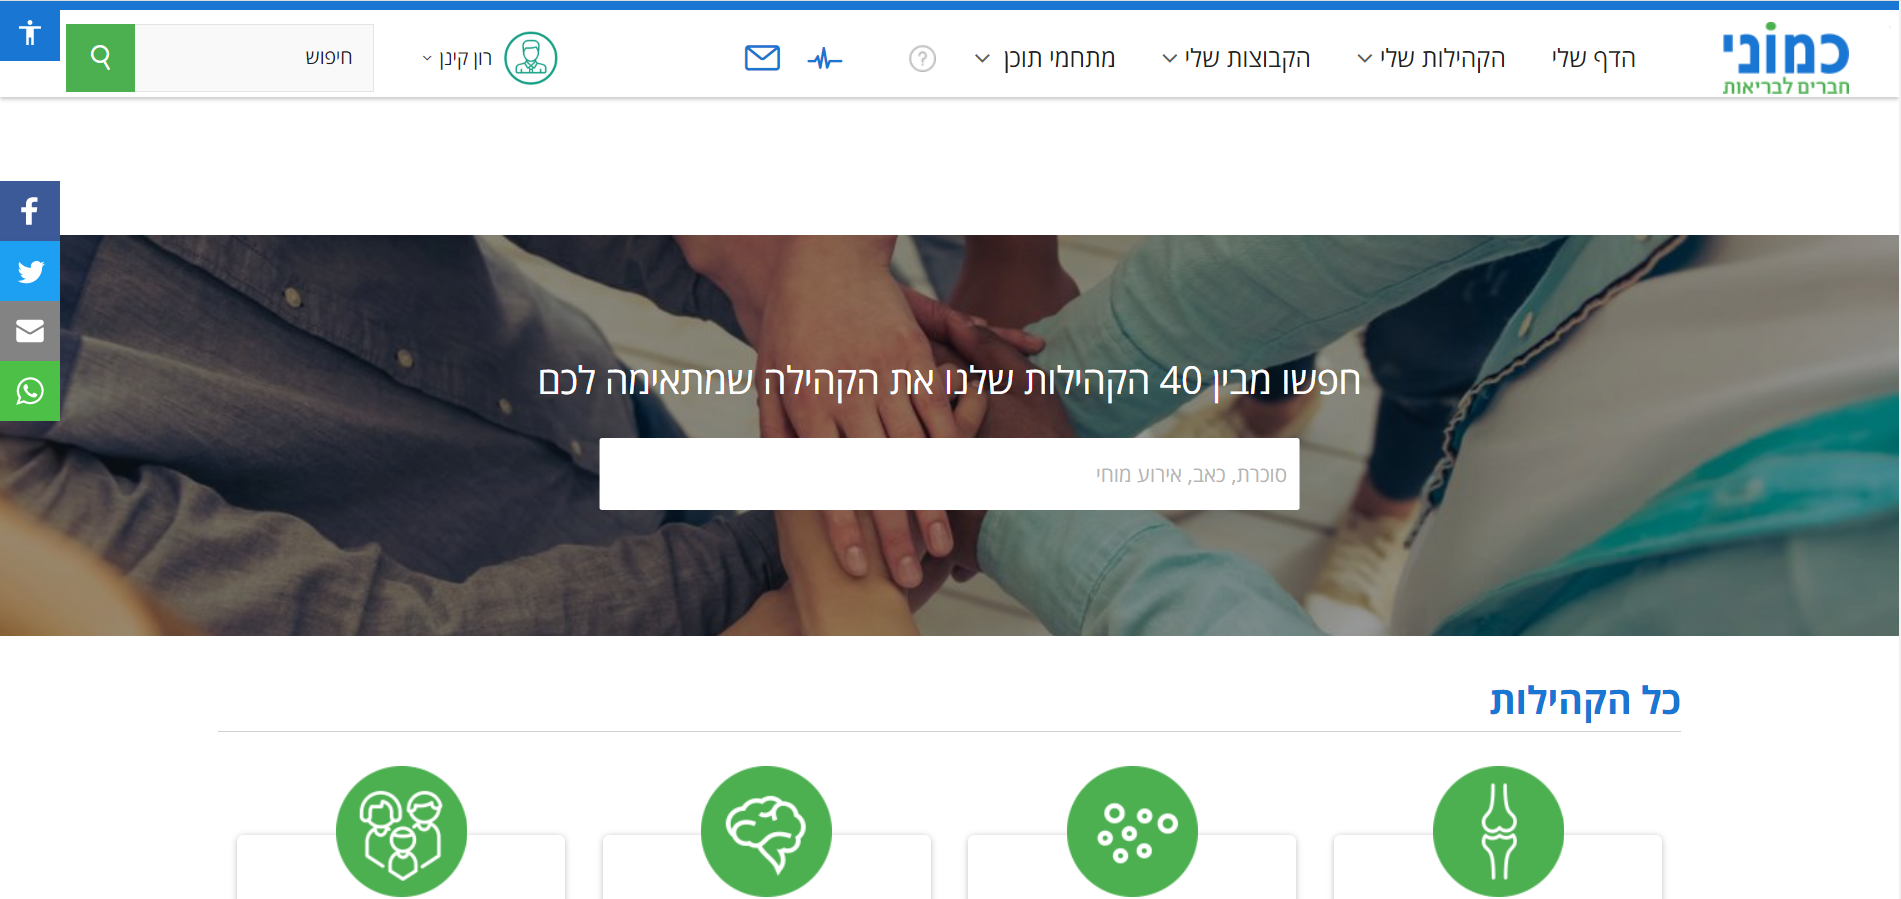

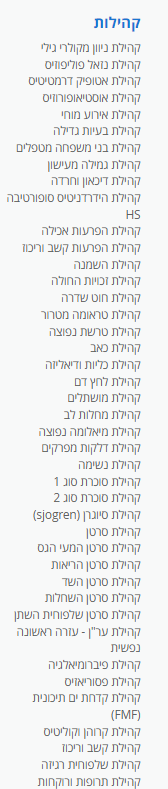

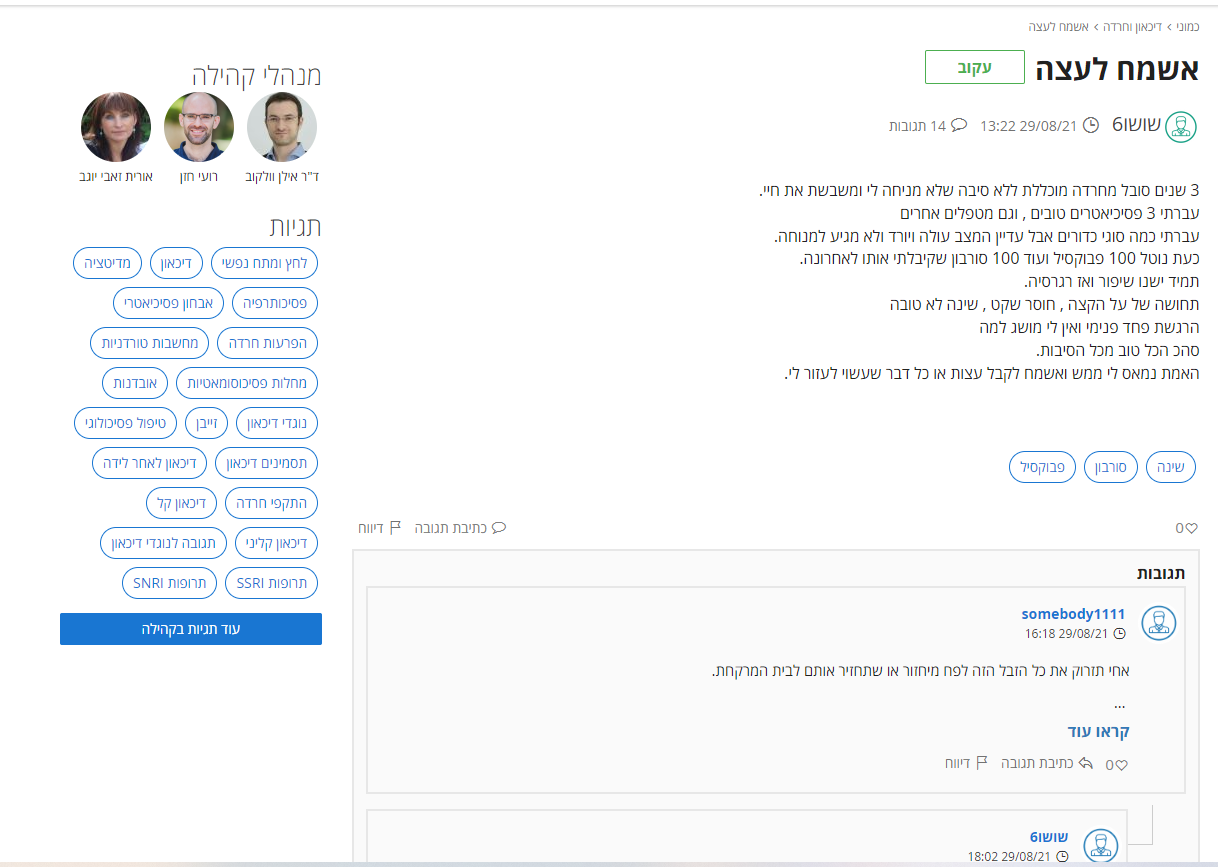

# **Data preperation**

##### **Building the data set**

Posts download:

In [ ]:
# -*- coding: cp1255 -*-   # sets the coding to hebrew and not gibrish
import requests
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

CHROME_DRIVER_PATH = "C:\\Users\\ronke\\Desktop\\chromedriver.exe"
DEFAULT_URL = "https://www.camoni.co.il/411804/"
DOWNLOAD_PATH  ="C:\\Users\\ronke\\Desktop\\parsing\\new_posts\\"
LOG_FILE_PATH = DOWNLOAD_PATH + "\log_file_posts_download_" + str(datetime.now().strftime("%d-%m-%y")) + ".txt"
posts_count = 0


def double_print(my_str):
    global log_file
    print(my_str)
    log_file.write(my_str + "\n")


log_file = open(LOG_FILE_PATH, 'a')
double_print("\n" + str(datetime.now().strftime("%d/%m/%y %H:%M:%S")) + " - Starting getting users file")
double_print(
    "-----------------------------------------------------------------------------------------------------------------")

chrome_options = Options()
chrome_options.add_argument("--headless")
browser = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)

"""
525000-571066 V
10000-50000 V - check if real posts
100000-140000 V
500000-525000”
"""
FROM = 18790
TO = 580000
for page_number in range(FROM, TO):  # range(FROM, TO):
    url = DEFAULT_URL + str(page_number)

    try:
        browser.get(url)
        response = browser.page_source
    except Exception as e:
        double_print(str(page_number) + " failed because: " + str(e))
        continue

    if "p404" not in response:
        try:
            with open(DOWNLOAD_PATH + str(page_number) + ".html", "wb") as file:  # save as
                file.write(response.encode())
        except Exception as e:
            double_print(str(page_number) + " failed because: " + str(e))
            continue

        double_print(
            str(datetime.now().strftime("%d/%m/%y - %H:%M:%S")) + " - created successfully file: " + str(page_number))
        posts_count += 1
    else:
        double_print(str(datetime.now().strftime("%d/%m/%y - %H:%M:%S")) + " - failed file # " + str(
            page_number) + " status code: 404")

    # time.sleep(0.5)
    if ((page_number-FROM) % 100) == 0:
        log_file.flush()

double_print(
    "-----------------------------------------------------------------------------------------------------------------")
double_print(
    "\n" + str(datetime.now().strftime("%d/%m/%y - %H:%M:%S")) + " - Downloaded " + str(posts_count) + " files!")
log_file.close()


ModuleNotFoundError: ignored

In [ ]:
posts parsing:

SyntaxError: ignored

In [ ]:
# -*- coding: cp1255 -*-   # sets the coding to hebrew and not gibrish
import datetime
import os
import random
import time
from time import strftime, localtime
from bs4 import BeautifulSoup
import xlsxwriter

DEFAULT_URL = "https://www.camoni.co.il/411804/"
OUTPUT_FOLDER = u'C:\\Users\\ronke\\Deskto\\parsing\\'
INPUT_DIR = "C:\\Users\\ronke\\Desktop\\parsing\\new_posts_with_selenium"

FAILURE = -1
COMMUNITIES = ['אוסטאופורוזיס', 'אטופיק דרמטיטיס', 'אירוע מוחי', 'בני משפחה מטפלים', 'בעיות גדילה', 'גמילה מעישון',
               'דיכאון וחרדה', 'הידרדניטיס סופורטיבה HS', 'הפרעות אכילה', 'השמנה', 'זכויות החולה', 'חוט שדרה',
               'טראומה מטרור ומלחמה', 'טרשת נפוצה', 'כאב', 'כליות ודיאליזה', 'לחץ דם', 'מושתלים', 'מחלות לב',
               'מיאלומה נפוצה', 'מפרקים', 'ניוון מקולרי גילי (AMD)', 'נשימה', 'סוכרת סוג-1', 'סוכרת סוג-2',
               'סיוגרן (sjogren)', 'סרטן', 'סרטן המעי הגס', 'סרטן הריאות', 'סרטן השד', 'סרטן השחלות',
               'סרטן שלפוחית השתן', 'ער"ן - עזרה ראשונה נפשית', 'פיברומיאלגיה', 'פסוריאזיס', 'קדחת ים תיכונית (FMF)',
               'קרוהן וקוליטיס', 'קשב וריכוז', 'שלפוחית רגיזה', 'תרופות ורוקחו']


class Talkback:
    def __init__(self):
        self.Content = ""
        self.Publisher = ""
        self.Date = ""
        self.Time = ""
        self.Word_number_in_post = 0
        self.Char_number_in_post = 0
        self.Likes_num = 0


class Full_Post:
    def __init__(self):
        self.Number = ""
        self.ID = ""
        self.Date = ""
        self.Time = ""
        self.Group = ""
        self.Group_type = ""
        self.Author = ""
        self.Title = ""
        self.Content = ""
        self.Word_number_in_post = 0
        self.Char_number_in_post = 0
        self.Talkback_list = []
        self.Talkbacks_num = 0
        self.URL = ""
        self.Likes_num = 0


def get_full_post_details(file_to_parse, post_number):
    post = Full_Post()
    post.ID = (file_to_parse[-11:-5]).replace('\\', '')  # take end of path as file name

    fp = open(file_to_parse, "rb")
    page = fp.read()
    soup = BeautifulSoup(page, 'html.parser')

    for elem in soup.find_all(["a", "p", "div", "h3", "br"]):  # create new line in text objects
        elem.append('\n')

    # ______________________________________________________________________________________________________________________________________________________________
    EmptyPage = soup.find('div', attrs={'class': "error-num"})
    if EmptyPage is not None:
        print(file_to_parse, "not Found", EmptyPage.text)
        post.Number = post_number - 1
        return FAILURE

    stuff = soup.find('a', attrs={'class': "communityLink"})
    if stuff is None:  # not community
        return FAILURE
    post.Group = stuff.text.rstrip('\n')
    if post.Group=='':
        post.Group="קבוצה שנסגרה"

    if post.Group in COMMUNITIES:
        post.Group_type = "community"
    else:
        post.Group_type = "group"

    content = soup.find('div', attrs={'class': "wrappContent"})
    stuff = content.find('div', attrs={'class': "postTitle"})
    if stuff is None:
        post.Title = ""
    else:
        post.Title = stuff.text
    stuff = content.find('div', attrs={'class': "MessageSubject"})
    if stuff is None:
        stuff = content.find('div', attrs={'class': "Bg_text"})
        if stuff is None:
            post.Content = "ERROR"
        else:
            post.Content = stuff.text
    else:
        post.Content = stuff.text

    # stuff = content.find('a', attrs={'class': "postMemberName"})
    stuff = content.find('div', attrs={'class': "postDetail"})

    if stuff is None:
        stuff = content.find('img', attrs={'alt': "Anonymouse"})
    if stuff is None:
        post.Author = "ERROR"
    else:
        post.Author = stuff.text

    stuff = content.find('div', attrs={'class': "postDetail"})
    if stuff is None:
        post.Author = "ERROR"
    else:
        post.Author = stuff.text

    try:
        stuff = content.findAll('div', attrs={'class': "postDetail"})
        post_time = stuff[1].text
        times = get_correct_time(post_time, file_to_parse)

        post.Date = str(times[0])
        post.Time = str(times[1])

    except Exception as e:
        post.Time = "ERROR"
        post.Date = "ERROR"
        print("error with date or time because: ", str(e))

    post.Word_number_in_post = len(post.Content.split())
    post.Char_number_in_post = len(post.Content)

    talckbacks_num = stuff[2].text.split()
    post.Talkbacks_num = talckbacks_num[0]

    stuff = soup.findAll('div', attrs={'class': "iComm"})
    for comment in stuff:
        current_talkback = Talkback()
        try:
            comment_data = comment.find('div', attrs={'class': "readMoreFullText"})
            if comment_data is None:
                comment_data = comment.find('div', attrs={'class': "textCom enableEmoticons"})
            if comment_data is None:
                comment_data = comment.find('div', attrs={'class': "textCom enableEmoticons1"})

            if comment_data is not None:
                current_talkback.Content = comment_data.text
        except Exception as e:
            current_talkback.Content = "ERROR" + str(e)

        try:
            comment_writer = comment.find('a', attrs={'class': "postMemberName"})
            if comment_writer is None:
                comment_writer = comment.find('div', attrs={'class': "nameComm"})

            current_talkback.Publisher = comment_writer.text
        except Exception as e:
            current_talkback.Publisher = "ERROR" + str(e)

        try:
            comment_time = comment.find('div', attrs={'class': "commentTime"}).text
            comment_times = get_correct_time(comment_time, file_to_parse)
            current_talkback.Date = str(comment_times[0])
            current_talkback.Time = str(comment_times[1])
        except Exception as e:
            current_talkback.Date = "ERROR" + str(e)
            current_talkback.Time = "ERROR" + str(e)

        try:
            comment_likes = comment.find('span', attrs={'class': "likeTitle"}).text
            if len(comment_likes) == 0:
                current_talkback.Likes_num = 0
            else:
                current_talkback.Likes_num = int(comment_likes)
        except Exception as e:
            current_talkback.Likes_num = -1
            print(str(e))

        current_talkback.Word_number_in_post = len(current_talkback.Content.split())
        current_talkback.Char_number_in_post = len(current_talkback.Content)

        post.Talkback_list.append(current_talkback)
    # -------

    post.URL = DEFAULT_URL + post.ID

    try:
        post_likes = soup.find('span', attrs={'class': "likeTitle"}).text
        if len(post_likes) == 0:
            post.Likes_num = 0
        else:
            post.Likes_num = int(post_likes)
    except Exception as e:
        post.Likes_num = -1
        print(str(e))

    return post


def get_correct_time(time, file):
    if "אתמול" in time:
        modification_time_epoch = os.path.getmtime(file)
        modification_time_day = datetime.datetime.fromtimestamp(modification_time_epoch).strftime('%d/%m/%Y')
        times = (time.replace("אתמול ב:", modification_time_day)).split()
        times[0] = times[0][:-4] + times[0][-2:]  # make year only 2 digits
    elif "לפני" in time:
        time_list = time.split()
        subtract = int(time_list[1])
        modification_time_epoch = os.path.getmtime(file)
        modification_time_day = datetime.datetime.fromtimestamp(modification_time_epoch)
        good_date = (modification_time_day - datetime.timedelta(days=subtract)).strftime('%d/%m/%Y')
        good_date = good_date[:-4] + good_date[-2:]  # make year only 2 digits
        rand_hour = datetime.time(random.randrange(23), random.randrange(59)).strftime('%H:%M')
        times = [good_date, rand_hour]
    elif "בשעה האחרונה" in time:
        modification_time_epoch = os.path.getmtime(file)
        modification_time_day = datetime.datetime.fromtimestamp(modification_time_epoch).strftime('%d/%m/%Y %H:%M')
        times = modification_time_day.split()
        times[0] = times[0][:-4] + times[0][-2:]  # make year only 2 digits
    else:
        times = time.split()
    return times


def create_file(file_type):
    CAMONI_FILE_NAME = OUTPUT_FOLDER + "Camoni_" + str(file_type) + "__" + strftime("%d-%b-%Y-%H;%M",
                                                                                    localtime()) + ".xlsx"
    book = xlsxwriter.Workbook(CAMONI_FILE_NAME, {'strings_to_urls': False})  # prevent exception of "since it exceeds Excel's limit of 65,530 URLS per worksheet"
    sheet_full = book.add_worksheet(file_type+'_FULL')  # cell_overwrite_ok=True.
    sheet_communities = book.add_worksheet(file_type+'_COMMUNITIES')  # cell_overwrite_ok=True.
    sheet_groups = book.add_worksheet(file_type+'_GROUPS')  # cell_overwrite_ok=True.

    style = book.add_format({'bold': True, 'font_color': 'black'})
    print("created file: ", CAMONI_FILE_NAME)
    return book, sheet_full, sheet_communities, sheet_groups, style


def create_soup_posts_list():
    parsed_post_number = 0

    directory = os.fsencode(INPUT_DIR)
    posts_list = []

    for path, subdirs, files in os.walk(directory):
        for name in sorted(files):
            file = os.path.join(path, name)
            try:
                post = get_full_post_details(file.decode(), parsed_post_number)
            except Exception as e:
                print("error parsing with: " + str(name) + "because: " + str(e))
                continue
            if post == FAILURE:
                print("error parsing with: " + str(name))
                continue

            posts_list.append(post)
            parsed_post_number += 1

            if parsed_post_number % 500 == 0:  # save  file every 100 iterations
                print("-----------------------------------------------------------------parsed files: " + str(
                    parsed_post_number) + "---------------------------------------------------------------------")

    return posts_list


def create_headlines_posts_file(posts_sheet, style):
    posts_sheet.write(0, 0, u'Page Number', style)
    posts_sheet.write(0, 1, u'URL', style)
    posts_sheet.write(0, 2, u'Date', style)
    posts_sheet.write(0, 3, u'Time', style)
    posts_sheet.write(0, 4, u'Community', style)
    posts_sheet.write(0, 5, u'Group/Community', style)
    posts_sheet.write(0, 6, u'Post publisher', style)
    posts_sheet.write(0, 7, u'Title', style)
    posts_sheet.write(0, 8, u'Post content', style)
    posts_sheet.write(0, 9, u'Post words number', style)
    posts_sheet.write(0, 10, u'Post chars number', style)
    posts_sheet.write(0, 11, u'Post likes', style)
    posts_sheet.write(0, 12, u'Comment number', style)
    comment_idx = 1
    c1 = u'comment user #'
    c2 = u'comment #'
    for column in range(13, 20, 2):
        posts_sheet.write(0, column, c1 + str(comment_idx), style)
        posts_sheet.write(0, column + 1, c2 + str(comment_idx), style)
        comment_idx += 1


def create_headlines_comments_file(comments_sheet, style):
    comments_sheet.write(0, 0, u'Page Number', style)
    comments_sheet.write(0, 1, u'URL', style)
    comments_sheet.write(0, 2, u'Date', style)
    comments_sheet.write(0, 3, u'Time', style)
    comments_sheet.write(0, 4, u'Community', style)
    comments_sheet.write(0, 5, u'Group/Community', style)
    comments_sheet.write(0, 6, u'Comment author', style)
    comments_sheet.write(0, 7, u'Comment', style)
    comments_sheet.write(0, 8, u'Post/Comment', style)
    comments_sheet.write(0, 9, u'Word count', style)
    comments_sheet.write(0, 10, u'Char count', style)
    comments_sheet.write(0, 11, u'Likes count', style)


def write_full_post_to_file(post, line_number, sheet, post_number):
    sheet.write(line_number, 0, post.ID)
    sheet.write(line_number, 1, post.URL)
    sheet.write(line_number, 2, post.Date)
    sheet.write(line_number, 3, post.Time)
    sheet.write(line_number, 4, post.Group)
    sheet.write(line_number, 5, post.Group_type)
    sheet.write(line_number, 6, post.Author)
    sheet.write(line_number, 7, post.Title)
    sheet.write_string(line_number, 8, str(post.Content))
    sheet.write_number(line_number, 9, int(post.Word_number_in_post))
    sheet.write_number(line_number, 10, int(post.Char_number_in_post))
    sheet.write_number(line_number, 11, post.Likes_num)
    sheet.write_number(line_number, 12, int(post.Talkbacks_num))

    iField = 13
    i = 0

    for talkback in post.Talkback_list:
        sheet.write(line_number, iField + i, talkback.Publisher)
        content = talkback.Content
        if len(content) > 32767:  # maximum length of cell in xlsx is 32767
            content = content[:32766]
        sheet.write_string(line_number, iField + i + 1, str(content))
        i += 2


def write_comments_to_file(post, sheet, comment_number):
    # write original post
    sheet.write_number(comment_number, 0, int(post.ID))  # u'זיהוי'
    sheet.write(comment_number, 1, post.URL)  # u'זיהוי'
    sheet.write(comment_number, 2, post.Date)
    sheet.write(comment_number, 3, post.Time)
    sheet.write(comment_number, 4, post.Group)
    sheet.write(comment_number, 5, post.Group_type)
    sheet.write(comment_number, 6, post.Author)
    content = post.Content
    if len(content) > 32767:  # maximum length of cell in xlsx is 32767
        content = content[:32766]
    sheet.write_string(comment_number, 7, content)
    sheet.write(comment_number, 8, "post")
    sheet.write_number(comment_number, 9, post.Word_number_in_post)
    sheet.write_number(comment_number, 10, post.Char_number_in_post)
    sheet.write_number(comment_number, 11, post.Likes_num)

    comment_number += 1

    # write comments
    for i in range(int(post.Talkbacks_num)):
        comment = post.Talkback_list[i]
        sheet.write_number(comment_number, 0, int(post.ID))  # u'זיהוי'
        sheet.write(comment_number, 1, post.URL)
        sheet.write(comment_number, 2, comment.Date)
        sheet.write(comment_number, 3, comment.Time)
        sheet.write(comment_number, 4, post.Group)
        sheet.write(comment_number, 5, post.Group_type)
        sheet.write(comment_number, 6, comment.Publisher)
        text = comment.Content
        if len(text) > 32767:  # maximum length of cell in xlsx is 32767
            text = text[:32766]
        sheet.write_string(comment_number, 7, text)
        sheet.write(comment_number, 8, "comment")
        sheet.write_number(comment_number, 9, comment.Word_number_in_post)
        sheet.write_number(comment_number, 10, comment.Char_number_in_post)
        sheet.write_number(comment_number, 11, comment.Likes_num)

        comment_number += 1

    return comment_number


def main():
    posts_book, posts_sheet_full, posts_sheet_communities, posts_sheet_groups, style = create_file("POSTS")
    create_headlines_posts_file(posts_sheet_full, style)
    create_headlines_posts_file(posts_sheet_communities, style)
    create_headlines_posts_file(posts_sheet_groups, style)


    comments_book, comments_sheet_full, comments_sheet_communities, comments_sheet_groups, style = create_file("COMMENTS")
    create_headlines_comments_file(comments_sheet_full, style)
    create_headlines_comments_file(comments_sheet_communities, style)
    create_headlines_comments_file(comments_sheet_groups, style)


    posts_list = create_soup_posts_list()
    # sorted_post_list = sorted(posts_list, key=lambda post: post.ID)
    sorted_post_list = sorted(posts_list, key=lambda post: datetime.datetime.strptime(post.Date, '%d/%m/%y'))

    post_number = 1
    comment_number = 1
    post_community_line = 1
    post_group_line = 1
    comment_community_line = 1
    comment_group_line = 1

    for post in sorted_post_list:
        try:
            write_full_post_to_file(post, post_number, posts_sheet_full, post_number)
            if post.Group_type == "community":
                write_full_post_to_file(post, post_community_line, posts_sheet_communities, post_number)
                post_community_line += 1
            else:
                write_full_post_to_file(post, post_group_line, posts_sheet_groups, post_number)
                post_group_line += 1

            post_number += 1
        except Exception as e:
            print("error writing with: " + str(post.ID) + "because: " + str(e))
            continue

        if post_number % 500 == 0:  # save  file every x iterations
            print("-----------------------------------------------------------------written posts: " + str(
                post_number) + "---------------------------------------------------------------------")

        try:
            comment_number = write_comments_to_file(post, comments_sheet_full, comment_number)
            if post.Group_type == "community":
                comment_community_line = write_comments_to_file(post, comments_sheet_communities, comment_community_line)
            else:
                comment_group_line = write_comments_to_file(post, comments_sheet_groups, comment_group_line)
        except Exception as e:
            print("error writing with: " + str(post.ID) + "because: " + str(e))
            continue

        if comment_number % 500 == 0:  # update  file every x iterations
            print("-----------------------------------------------------------------written comments: " + str(
                comment_number) + "---------------------------------------------------------------------")

    posts_book.close()  # and save file
    comments_book.close()  # and save file


    print("written", comment_number-1, "comments!")
    print("from", post_number-1, "posts!")
    print("end")


if __name__ == '__main__':
    start_time = time.time()
    main()
    duration = (time.time() - start_time)
    print("Duration: ", datetime.timedelta(seconds=duration))


ModuleNotFoundError: ignored

Users download:

In [ ]:
# -*- coding: cp1255 -*-   # sets the coding to hebrew and not gibrish

from bs4 import BeautifulSoup
import os
import time
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from datetime import datetime

from webdriver_manager.chrome import ChromeDriverManager

CHROME_DRIVER_PATH = "C:\\Users\\ronke\\Desktop\\chromedriver.exe"
DEFAULT_URL = "https://www.camoni.co.il/411788/"
DOWNLOAD_PATH = "C:\\Users\\ronke\\Desktop\\parsing\\users_download_with_selenium\\"
SOURCE_FILE_NAMES = "C:\\Users\\ronke\\Desktop\\parsing\\411788"
LOG_FILE_PATH = DOWNLOAD_PATH + "log_file_users_download_" + str(datetime.now().strftime("%d-%m-%y")) + ".txt"
users_count = 0


def double_print(my_str):
    global log_file
    print(my_str)
    log_file.write(my_str)


log_file = open(LOG_FILE_PATH, 'w')
double_print("\n" + str(datetime.now().strftime("%d/%m/%y %H:%M:%S")) + " - Starting getting users file")
double_print("-----------------------------------------------------------------------------------------------------------------")

chrome_options = Options()
chrome_options.add_argument("--headless")
#browser = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH, options=chrome_options)
browser = webdriver.Chrome(ChromeDriverManager().install(), options=chrome_options)

user_files = os.listdir(SOURCE_FILE_NAMES)

for file_name in user_files[8148:]:
    try:
        url = DEFAULT_URL + file_name
        browser.get(url)
        content = browser.page_source

        with open(DOWNLOAD_PATH + file_name + ".html", "w", encoding='utf-8') as file:
            file.write(str(content))
            double_print(str(datetime.now().strftime("%d/%m/%y - %H:%M:%S")) + " - created successfully file: " + file_name)

        users_count += 1
        time.sleep(0.5)

    except Exception as e:
        double_print(file_name + " failed because: " + str(e))


browser.close()

double_print("-----------------------------------------------------------------------------------------------------------------")
double_print("\n" + str(datetime.now().strftime("%d/%m/%y - %H:%M:%S")) + " - Downloaded " + str(users_count) + " files!")
log_file.close()

Users parsing:

In [ ]:
# -*- coding: cp1255 -*-   # sets the coding to hebrew and not gibrish
import os
from time import strftime, localtime
import xlwt
from bs4 import BeautifulSoup

INPUT_DIR = "C:\\Users\\ronke\\Desktop\\parsing\\users_download_with_selenium"

OUTPUT_DIR = u'C:\\Users\\ronke\\Desktop\\parsing\\'
SUCCESS = 0
FAILURE = -1
DEFAULT_URL = "https://www.camoni.co.il/411788/"

book = xlwt.Workbook(encoding="utf-8")  # Excel file initialize:
sheet1 = book.add_sheet(u'Camoni')  # cell_overwrite_ok=True

gender_dict = {
    "זכר": "Male",
    "נקבה": "Female",
    "Deleted user 404": "Deleted user 404",
    "": "Empty"
}


class User:

    def __init__(self):
        self.Name = ""
        self.About_me = ""
        self.Gender = ""
        self.Age = ""
        self.Status = ""
        self.Join_date = ""
        self.Community_num = ""
        self.Communities = []
        self.Photo = ""


def get_user_details(user_file_to_parse):
    user = User()
    soup: BeautifulSoup
    try:
        # fp = open(user_file_to_parse, "r", errors='replace')  # errors ignore helps in case fo encoding problems. instead can "rb" read bytes
        fp = open(user_file_to_parse,
                  "rb")  # errors ignore helps in case fo encoding problems. instead can "rb" read bytes

        page = fp.read()
        soup = BeautifulSoup(page, 'html.parser')

        if "p404" in str((soup.find('title')).text):  # if page returned 404 http response - do not put in table
            user.Name = str(user_file_to_parse.decode()).rpartition('\\')[2].rpartition('.')[0]
            user.About_me = "Deleted user 404"
            user.Gender = "Deleted user 404"
            user.Age = "-1"
            user.Status = "Deleted user 404"
            user.Join_date = "-1"
            user.Community_num = "0"
            user.Communities = []
            user.Photo = "-1"
            return True, user

    except Exception as e:
        return False, e

    try:
        # rstrip removes \n in the end of string
        user.Name = (soup.find('h2', attrs={'class': "userName"})).get_text().rstrip()
    except Exception as e:
        user.Name = "ERROR"
        print(str(e))

    try:
        user.About_me = (soup.find('div', attrs={'class': "aboutMeText"})).get_text()
    except Exception as e:
        user.About_me = "ERROR"
        print(str(e))

    details = soup.findAll('div', attrs={'class': "personalInfoWrap"})
    if len(details) == 0:
        user.Name = str(user_file_to_parse.decode()).rpartition('\\')[2].rpartition('.')[0]
        user.About_me = "Empty user"
        user.Gender = "Empty user"
        user.Age = "-1"
        user.Status = "Empty user"
        user.Join_date = "-1"
        user.Community_num = "0"
        user.Communities = []
        user.Photo = "-1"
        return True, user

    for item in details:

        title = item.find('div', attrs={'class': "personalInfoTitle"}).get_text()
        try:
            content = item.find('div', attrs={'class': "personalInfoValue"}).get_text()
        except Exception as e:
            content = "ERROR"
            print(str(e))

        if "הצטרפתי" in title:
            user.Join_date = content.split(" ")[0]  # take date without time
        elif "גיל" in title:
            user.Age = content
        elif "מין" in title:
            user.Gender = gender_dict[content]
        elif "אני" in title:
            user.Status = content

    try:
        communities_soup = soup.findAll('a', attrs={'class': "communityLink"})
        for link in communities_soup:
            user.Communities.append(link.get_text())
        user.Community_num = len(user.Communities)
    except Exception as e:
        print(str(e))

    try:
        photo = soup.find('img', attrs={
            'class': "userProfilePic"})  # return tag of userProfilePic. contains dictionary with src as image source
        photo_url = photo.attrs.get('src')
        if "default_male" in photo_url or "default_female" in photo_url:
            user.Photo = "no"
        else:
            user.Photo = "yes"
    except Exception as e:
        print(str(e))

    return True, user


def set_style(border_num, boldness):
    style = xlwt.XFStyle()
    font = xlwt.Font()
    font.bold = boldness
    style.font = font

    borders = xlwt.Borders()
    borders.left = border_num
    borders.right = border_num
    borders.top = border_num
    borders.bottom = border_num
    if border_num > 0:
        style.borders = borders

    return style


def write_to_file(user, style, date_format, users_number, file):
    file_name = str(file.decode()).rpartition('\\')[2].rpartition('.')[0]
    click = DEFAULT_URL + file_name

    sheet1.write(users_number, 0, str(users_number), style)
    sheet1.write(users_number, 1, file_name, style)
    sheet1.write(users_number, 2, xlwt.Formula('HYPERLINK("%s";"Link")' % click), style)  # write as hyperlink to url
    sheet1.write(users_number, 3, user.Name, style)
    sheet1.write(users_number, 4, user.About_me, style)
    sheet1.write(users_number, 5, user.Join_date, date_format)
    sheet1.write(users_number, 6, user.Age, style)
    sheet1.write(users_number, 7, user.Gender, style)
    sheet1.write(users_number, 8, user.Status, style)
    sheet1.write(users_number, 9, user.Photo, style)
    sheet1.write(users_number, 10, user.Community_num, style)
    sheet1.write(users_number, 11, ''.join(str(item) for item in user.Communities), style)


def main():
    users_number = 0  # number of parsed discussions (presents the current open line in the excel file
    users_fails_number = 0

    reg_style = set_style(6, True)
    sheet1.write(0, 0, u'Serial Number', reg_style)
    sheet1.write(0, 1, 'file', reg_style)
    sheet1.write(0, 2, 'URL', reg_style)
    sheet1.write(0, 3, 'Name', reg_style)
    sheet1.write(0, 4, u'About me', reg_style)
    sheet1.write(0, 5, u'Joining date', reg_style)
    sheet1.write(0, 6, u'Age', reg_style)
    sheet1.write(0, 7, u'Gender', reg_style)
    sheet1.write(0, 8, u'Status', reg_style)
    sheet1.write(0, 9, 'picture', reg_style)
    sheet1.write(0, 10, u'Community number', reg_style)
    sheet1.write(0, 11, u'Communities', reg_style)

    print("today:", strftime("%d-%b-%Y - %H:%M", localtime()))
    CamoniFileName = OUTPUT_DIR + "Camoni_USERS" + "__" + strftime("%d-%b-%Y-%H;%M", localtime()) + ".xls"
    # ---

    directory = os.fsencode(INPUT_DIR)

    reg_style = set_style(1, False)
    date_format = set_style(1, False)
    date_format.num_format_str = 'dd/mm/yy'

    failed_users = []

    for path, subdirs, files in os.walk(directory):
        for name in files:
            file = os.path.join(path, name)
            stat, user = get_user_details(file)
            if stat is True:
                users_number += 1
                write_to_file(user, reg_style, date_format, users_number, file)
            else:
                print(str(name.decode()) + "failed because: " + str(user))
                users_fails_number += 1
                failed_users.append(name.decode())
            if users_number % 500 == 0:
                print("parsed", users_number, "files")

    print(CamoniFileName)
    sheet1.write(users_number + 1, 1, "\n")
    sheet1.write(users_number + 1, 2, "\n")
    sheet1.write(users_number + 1, 7, "\n")
    book.save(CamoniFileName)

    print("parsed", users_number, "users!")
    print("failed", users_fails_number, "users!")

    print("end")
    print(failed_users)


if __name__ == '__main__':
    main()


Communities download and parse:

In [ ]:
# -*- coding: cp1255 -*-   # sets the coding to hebrew and not gibrish
import os
from time import strftime, localtime

import requests
import xlwt
from bs4 import BeautifulSoup

OUTPUT_FOLDER = u'C:\\Users\\ronke\\Desktop\\parsing\\'


community_number = 1
book = xlwt.Workbook(encoding="utf-8")  # Excel file initialize:
sheet1 = book.add_sheet(u'Camoni')  # cell_overwrite_ok=True


def get_community_details(file_to_parse):

    page = file_to_parse.content
    soup = BeautifulSoup(page, 'html.parser')

    communities = soup.findAll('div', attrs={'class': "nameCommu"})
    communities_num = soup.findAll('div', attrs={'class': "sumFriends"})
    community_friends = []
    for i in range(len(communities_num)):
        txt = communities_num[i].text
        txt = txt.split()
        num = txt[0].replace(',', '')
        community_friends.append(num)
    return communities, community_friends


def set_style(border_num, boldness):
    style = xlwt.XFStyle()
    font = xlwt.Font()
    font.bold = boldness
    style.font = font

    borders = xlwt.Borders()
    borders.left = border_num
    borders.right = border_num
    borders.top = border_num
    borders.bottom = border_num
    if border_num > 0:
        style.borders = borders

    return style


def main():
    global community_number

    style = set_style(6, True)

    sheet1.write(0, 0, u'Serial Number', style)
    sheet1.write(0, 1, u'Community Name', style)
    sheet1.write(0, 2, u'Members number', style)

    style = set_style(1, False)

    print("today:", strftime("%d-%b-%Y - %H:%M", localtime()))
    CamoniFileName = OUTPUT_FOLDER + "Camoni_COMMUNITIES" + "__" + strftime("%d-%b-%Y-%H;%M", localtime()) + ".xls"
    # ---

    url = "https://www.camoni.co.il/411785"
    try:
        response = requests.get(url)
    except Exception as e:
        print(str(e))

    communities, community_friends = get_community_details(response)
    for i in range(len(communities)):
        sheet1.write(i+1, 0, community_number, style)
        sheet1.write(i+1, 1, communities[i].text, style)
        sheet1.write(i+1, 2, community_friends[i], style)
        community_number += 1


    print(CamoniFileName)
    book.save(CamoniFileName)
    print("end")


if __name__ == '__main__':
    main()



##### **Downloading the data set**

In [ ]:
import os
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import Font, Alignment, Border, Side
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import imblearn
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from string import punctuation
import numpy as np
import math
import seaborn as sns

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt
%matplotlib inline

import time
t1 = time.perf_counter()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_path = '/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/'
full_data = pd.read_excel(data_path+'camoni full comments.xlsx')
full_data['Community'].value_counts()

דיכאון וחרדה                62221
הפרעות אכילה                36950
ער"ן - עזרה ראשונה נפשית    35618
טרשת נפוצה                  21422
כאב                         15715
קרוהן וקוליטיס              15179
סוכרת סוג-2                 14715
תרופות ורוקחות              13057
כליות ודיאליזה              10557
חוט שדרה                     6831
נשימה                        5433
קשב וריכוז                   5210
השמנה                        5202
מחלות לב                     5124
אוסטאופורוזיס                4715
לחץ דם                       3922
סרטן                         3501
מפרקים                       3438
גמילה מעישון                 3391
זכויות החולה                 2681
אירוע מוחי                   2475
שלפוחית רגיזה                2258
פסוריאזיס                    2181
סרטן השד                     1765
מיאלומה נפוצה                1705
סיוגרן (sjogren)             1359
מושתלים                       888
בני משפחה מטפלים              851
טראומה מטרור ומלחמה           828
בעיות גדילה   

In [ ]:
data = full_data[full_data['Community'].isin(['הידרדניטיס סופורטיבה', 'סרטן השחלות'])]

In [ ]:
data['Community'] = data['Community'].replace('סרטן השחלות', 'ovarian cancer')
data['Community'] = data['Community'].replace('הידרדניטיס סופורטיבה','hydradenitis suppurativa')

In [ ]:
data

,Date,Time,Community,Comment author,Comment,Post/Comment
114916,21/02/16,19:56,ovarian cancer,מרווה\n,\nבריאות לכולם אמן! \n\n\n,post
114965,22/02/16,9:54,ovarian cancer,נירית\n,\nקראתי על התסמינים של סרטן השחלות אחרי תקופה ...,post
114966,28/02/16,21:54,ovarian cancer,"ד""ר דניאלה כץ\n",רופא נשים היא הכתובת. בכל מקרה ההמלצה היא לביק...,comment
115195,24/02/16,16:09,ovarian cancer,י.\n,\nאמא שלי הופנתה ורציתי לדעת איך זה מתבצע? האם...,post
115196,28/02/16,21:51,ovarian cancer,"ד""ר דניאלה כץ\n",הוצאת נוזלים מחלל הצפק מתבצעת לרב ללא הרדמה מק...,comment
...,...,...,...,...,...,...
288452,11/11/21,13:27,ovarian cancer,gali1212q\n\n,"\nשלום, \nאני חולה בסרטן השחלות, כשנתיים וחצי....",post
288453,15/11/21,17:16,ovarian cancer,"ד""ר אורה רוזנגרטן\n",שלום רב\nלאור העובדה שמדובר בגידול שאינו מבטא ...,comment
288583,12/11/21,14:30,ovarian cancer,ענתמאיה\n\n,\nאובחנו עם סרטן השחלה דמוי רירית הרחם.\nהסרטן...,post
288584,15/11/21,17:18,ovarian cancer,"ד""ר אורה רוזנגרטן\n","שלום לך\nמתוך כל הגידולים של הרחם או השחלה - ""...",comment


# Data Exploration

In [ ]:
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

412
['Date', 'Time', 'Community', 'Comment author', 'Comment', 'Post/Comment']
Date              object
Time              object
Community         object
Comment author    object
Comment           object
Post/Comment      object
dtype: object


In [ ]:
data['Community'].value_counts()

ovarian cancer              215
hydradenitis suppurativa    197
Name: Community, dtype: int64

In [ ]:
data.groupby('Community').describe()

Date                        Time                     \
                         count unique       top freq count unique    top freq   
Community                                                                       
hydradenitis suppurativa   197    131  18/02/20    6   197    181  11:13    2   
ovarian cancer             215    147  15/11/16    5   215    202  17:49    2   

                         Comment author                                   \
                                  count unique                  top freq   
Community                                                                  
hydradenitis suppurativa            197     87    ד"ר אריאלה הפנר\n   33   
ovarian cancer                      215    107  ד"ר אורה רוזנגרטן\n   39   

                         Comment         \
                           count unique   
Community                                 
hydradenitis suppurativa     197    196   
ovarian cancer               215    214   

                                                                             \
                                                                        top   
Community                                                                     
hydradenitis suppurativa  שלום לך דייב! הנה מוזמן לקרוא על כך בפירוט בקי...   
ovarian cancer                                                 תודה רבה\n\n   

                              Post/Comment                       
                         freq        count unique      top freq  
Community                                                        
hydradenitis suppurativa    2          197      2  comment  123  
ovarian cancer              2          215      2  comment  115

Text(0, 0.5, 'feature amount')

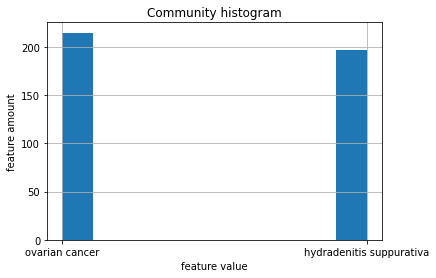

In [ ]:
hist1=data['Community'].hist()
hist1.set_title('Community histogram')
hist1.set_xlabel("feature value")
hist1.set_ylabel("feature amount")

In [ ]:
import plotly.express as px
fig = px.pie(data, names='Community', title ='Pie chart of different communities of posts')
fig.show()

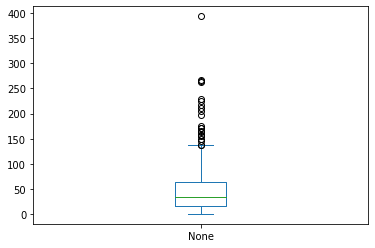

In [ ]:
# Calculate post lengths
post_len = pd.Series([len(post.split()) for post in data['Comment']])

# The distribution of tweet text lengths
post_len.plot(kind='box')

<ipython-input-506-e42217196e64>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



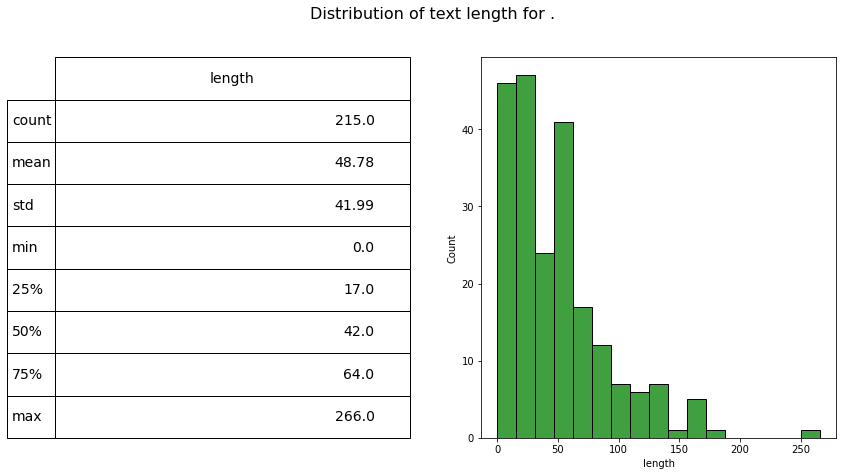

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='ovarian cancer']['length'], ax=ax1,color='green')
describe = data.length[data.Community=='ovarian cancer'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)

plt.show()

<ipython-input-507-13485b6e8adc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



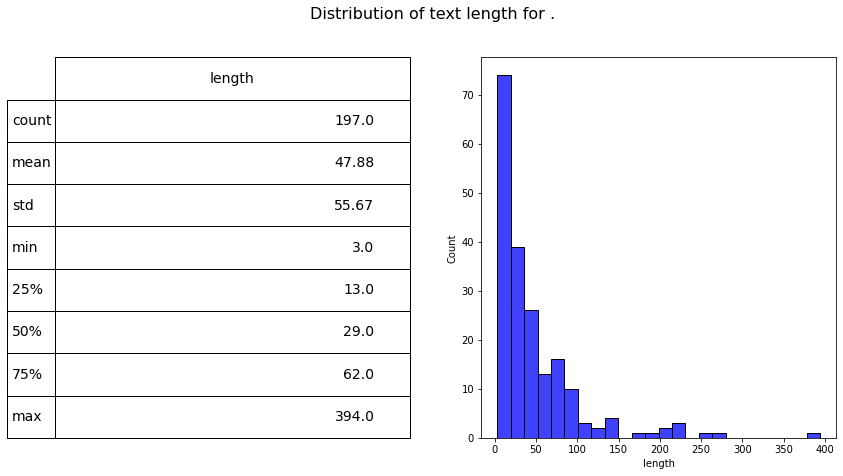

In [ ]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.Comment.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['Community']=='hydradenitis suppurativa']['length'], ax=ax1,color='blue')
describe = data.length[data.Community=='hydradenitis suppurativa'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for .', fontsize=16)

plt.show()

# Data Pre processing

In [ ]:
STOP_WORDS = open('/content/gdrive/MyDrive/Machine Learning course 5783/Final Project/data/heb_stopwords.txt', "r")
STOP_WORDS = STOP_WORDS.read()
STOP_WORDS = STOP_WORDS.split("\n")
print(STOP_WORDS[:10])

['את', 'לא', 'של', 'אני', 'על', 'זה', 'עם', 'כל', 'הוא', 'אם']


In [ ]:
import re
def pre_process_text(text):
    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # remove stop words
    text_ = [word for word in text.split() if word not in STOP_WORDS]

    # remove not hebrew letters
    my_word = re.sub(r'[^אבגדהוזחטיכלמנסעפצקרשתםןץףך]{3,}', ' ', ' '.join(text_))
    my_word2 = re.sub(r'(\s)([אבגדהוזחטיכלמנסעפצקרשתםןץףך])(\s)', ' ', my_word)

    return my_word2

In [ ]:
basic_texts = data['Comment']
labels = data['Community']

In [ ]:
basic_texts[:10]

114916                           \nבריאות לכולם אמן! \n\n\n
114965    \nקראתי על התסמינים של סרטן השחלות אחרי תקופה ...
114966    רופא נשים היא הכתובת. בכל מקרה ההמלצה היא לביק...
115195    \nאמא שלי הופנתה ורציתי לדעת איך זה מתבצע? האם...
115196    הוצאת נוזלים מחלל הצפק מתבצעת לרב ללא הרדמה מק...
115197    תודה על התשובות. זה אומר שאם יש למישהי מארקר ח...
115198    נכון. לא כל עלייה במרקר בש125 פירושה סרטן.\nאב...
115335    \nמבקשת לדעת אם עלייה במשקל והשמנה בעיקר בפלג ...
115336                       שלום,\nלא שידוע לי\nד"ר כץ\n\n
115670    \nשלום וערב טוב. אני מחפשת המלצה על רופא מומחה...
Name: Comment, dtype: object

In [ ]:
clean_texts = []
for text in basic_texts:
    clean_txt = pre_process_text(text)
    clean_texts.append(clean_txt)  # create pre-processed text list
# add to dataframe column with the clean text


In [ ]:
clean_texts[:10]

['בריאות אמן',
 'קראתי התסמינים סרטן השחלות תקופה ארוכה נפיחות בבטן תחתונה גזים ורציתי לאיזה רופא צרכה לפנות להיבדק רופא נשים',
 'רופא נשים הכתובת ההמלצה לביקורת גניקולוגית שנתית רפואה שלמה דר כץ',
 'הופנתה ורציתי מתבצע בהרדמה מרקר חיובי המשמעות סרטן שחלה',
 'הוצאת נוזלים מחלל הצפק מתבצעת לרב הרדמה מקומית ידי החדרת מחט עירוי לבטן התחתונה כשהעירוי ממוקם שולפים המחט המתכתית החוצה ונותרת צינורית פלסטיק דקיקה דרכה מתנקז הנוזל בקבוק שקית פלסטיק מוגבר מאפיין סרטן שחלה סרטן שד עשוי להעלות לזכור שמרקרים מרקרים והם חזות באיבחון המחלה אמצעי מעקב תוצאות טיפול חזרת מחלה בברכה דר כץ',
 'התשובות למישהי מארקר חיובי בהכרח חולה',
 'עלייה במרקר בש פירושה סרטן עליה משמעותית פי מחייבת מעקב ובירור',
 'מבקשת עלייה במשקל והשמנה בפלג הגוף התחתון הינן תופעות ידועות ניתוח וטיפולים',
 'שידוע דר כץ',
 'וערב מחפשת המלצה רופא מומחה בתחום הגניקו אונקולוגיה לייעוץ ומעקב באזור המרכז']

# Data Classification - basic model



In [ ]:
data_for_basic = data.copy()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['Date', 'Time', 'Community', 'Comment author', 'Comment', 'Post/Comment']:
    data_for_basic[col] = lb.fit_transform(data_for_basic[col])

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data_for_basic = pd.DataFrame(msc.fit_transform(data_for_basic),  # this is an np.array, not a dataframe.
                    columns=data_for_basic.columns)

In [ ]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data_for_basic.columns if x != 'Community']

# Split the data into two dataframes
X_data = data_for_basic[x_cols]
y_data = data_for_basic['Community']

In [ ]:
# RK - let's check in a simple way, how much accurate is the KNN model:

def calc_acc(y_data, y_pred):
  different = 0
  for i in range(len(y_data)):
    if y_data.values[i] != y_pred[i]:
      different += 1

  print("Number of mistakes: ", different)
  mistake_per = (different/len(y_data))*100
  print("Percent of mistakes: ", mistake_per,"%")
  print("Accuracy: ", 100-mistake_per,"%")


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_data, y_data)
y_pred = knn.predict(X_data)
calc_acc(y_data, y_pred)

Number of mistakes:  119
Percent of mistakes:  28.883495145631066 %
Accuracy:  71.11650485436894 %


In [ ]:
lr = LogisticRegression()
lr = lr.fit(X_data, y_data)
y_pred = lr.predict(X_data)
calc_acc(y_data, y_pred)

Number of mistakes:  187
Percent of mistakes:  45.38834951456311 %
Accuracy:  54.61165048543689 %


# Data Preperation - tf-idf model

TF-IDF (term frequency-inverse document frequency) is a method used to quantify the importance of a word in a document within a collection of documents. It is commonly used in text classification and information retrieval tasks.

In the TF-IDF method, the importance of a word in a document is determined by two factors: its term frequency (TF) and its inverse document frequency (IDF). TF is the number of times a word appears in a document, and IDF is the logarithmically scaled inverse fraction of the documents that contain the word. The product of TF and IDF is the TF-IDF weight of a word in a document.

Once the TF-IDF weights of all the words in a document have been calculated, they can be used as features in a machine learning classifier. Classic machine learning classifiers such as Naive Bayes, SVM, decision trees, etc. can then be trained on these features to classify texts into different categories.

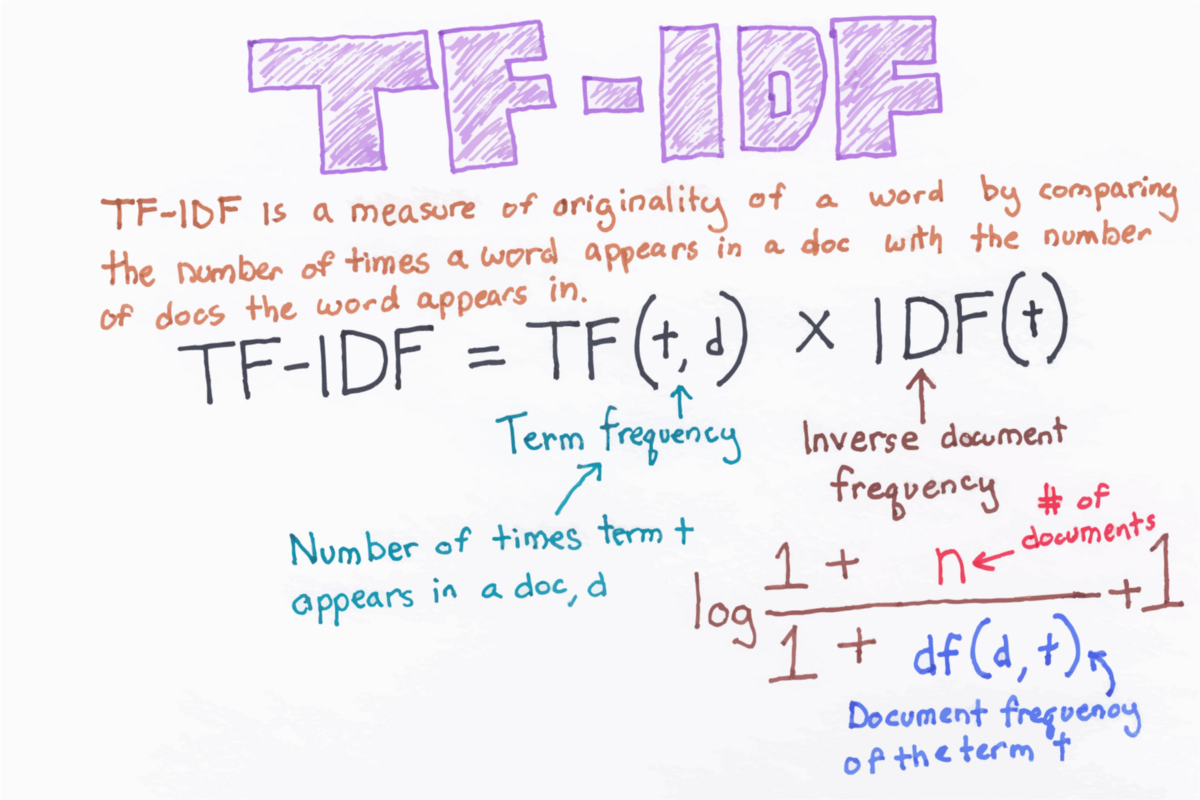

In [ ]:
ANALYZER_SIZE_LIST = [['word', 1],
                      ['word', 2], 
                      ['word', 3], 
                      ]

ROUND_DIGITS = 4

texts = clean_texts
number_of_texts = len(texts)
united_texts = '\n'.join(texts)
min_df=0
df_dict = {}
for analyzer, ngram_range in ANALYZER_SIZE_LIST:
    if analyzer == 'word':
        if ngram_range == 1:
            words = united_texts.split()
        else:
          words = []
          for text in texts:
            words.extend(CountVectorizer(ngram_range=(ngram_range,ngram_range)).build_analyzer()(text))
            
    elif analyzer == 'char':
        words = []
        for post in united_texts.split('\n'):
            for i in range(len(post) - ngram_range + 1):
                words.append(post[i:i + ngram_range])

    number_of_words = len(words)
    words_list = list(set(words))
    # remove empty strings from the list
    words_list = [word for word in words_list if word != '']

    new_df = pd.DataFrame(
        columns=['term', 'texts_number', 'number_in_dataset', 'tf', 'idf', 'tf-idf'])
    for word in words_list:
        number_of_texts_with_word = 0
        for text in texts:
            if word in text:
                number_of_texts_with_word += 1

        number_of_word_in_dataset = words.count(word)

        if number_of_texts_with_word >= min_df and number_of_word_in_dataset >= min_df:
            tf = number_of_word_in_dataset / number_of_words
            idf = number_of_texts / (number_of_texts_with_word + 1)
            idf = math.log(idf)
            tf_idf = tf * idf
            new_df = new_df.append(
                {'term': word,  'texts_number': number_of_texts_with_word,
                 'number_in_dataset': number_of_word_in_dataset,
                 'tf': round(tf, ROUND_DIGITS), 'idf': round(idf, ROUND_DIGITS),
                 'tf-idf': round(tf_idf, ROUND_DIGITS)}, ignore_index=True)

    df_dict[analyzer + '_' + str(ngram_range)] = new_df.sort_values(by='tf-idf', ascending=False)
    print('finished calc', analyzer, ngram_range)

finished calc word 1
finished calc word 2
finished calc word 3


In [ ]:
df_dict['word_1']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
758,המחלה,58,69,0.0057,1.9435,0.0110
2389,הטיפול,47,49,0.0040,2.1498,0.0087
2041,טיפול,130,82,0.0068,1.1458,0.0077
3239,רב,92,63,0.0052,1.4884,0.0077
4433,לטיפול,32,36,0.0030,2.5245,0.0075
...,...,...,...,...,...,...
3613,בנ,69,1,0.0001,1.7725,0.0001
1678,יד,182,2,0.0002,0.8115,0.0001
2608,תו,173,2,0.0002,0.8620,0.0001
3219,חי,139,1,0.0001,1.0794,0.0001


In [ ]:
df_dict['word_2']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
9044,דר כץ,25,25,0.0021,2.7629,0.0059
535,בברכת בריאות,18,18,0.0015,3.0766,0.0047
10778,בברכה דר,14,14,0.0012,3.3130,0.0040
10904,סרטן שחלה,21,16,0.0014,2.9300,0.0040
1617,דר הפנר,18,14,0.0012,3.0766,0.0037
...,...,...,...,...,...,...
6775,נשים מוטציה,3,1,0.0001,4.6347,0.0004
2502,בלוטות סתומות,2,1,0.0001,4.9224,0.0004
6466,חומר ניגוד,2,1,0.0001,4.9224,0.0004
1258,יצאו פצעים,2,1,0.0001,4.9224,0.0004


In [ ]:
df_dict['word_3']

,term,texts_number,number_in_dataset,tf,idf,tf-idf
10537,בברכה דר כץ,13,13,0.0011,3.3820,0.0039
3893,בברכת בריאות שלמה,13,13,0.0011,3.3820,0.0039
1746,הסרת שיער בלייזר,2,5,0.0004,4.9224,0.0022
651,האגודה למלחמה בסרטן,5,5,0.0004,4.2293,0.0019
6771,לייזר להסרת שיער,3,4,0.0004,4.6347,0.0016
...,...,...,...,...,...,...
8846,לפנות לטיפול פסיכולוגי,2,1,0.0001,4.9224,0.0004
9004,למלחמה בסרטן תוכל,2,1,0.0001,4.9224,0.0004
2904,רופאת העור ראתה,2,1,0.0001,4.9224,0.0004
2628,דר חמאיסי ברמבם,2,1,0.0001,4.9224,0.0004


# Feature selection - tf-idf model

In [ ]:
TERM_NUMBER_LIST = [500, 1000, 2000, 3000, 4000, 6000, 8000, 10000]

CLASSIFIERS = {
               # Classic
               'KNN': KNeighborsClassifier(),
               'Logistic Regression': LogisticRegression(),
               'Multinomial Naive Bayes': MultinomialNB(),
               'Support Vector Machine': SVC(),
               'Desicion Tree': DecisionTreeClassifier(),

                # Bagging
               'Bagging Classifier DT - Random Forest': RandomForestClassifier(),
               'Bagging Classifier SVM': BaggingClassifier(base_estimator = SVC()),
               'Bagging Classifier LR': BaggingClassifier(base_estimator = LogisticRegression()),

               # Boosting
               'Gradient Boosting DT': GradientBoostingClassifier(),
               'Ada Boost DT': AdaBoostClassifier(),
               'Ada Boost SVM': AdaBoostClassifier(base_estimator = SVC(), algorithm='SAMME'),
               'Ada Boost LR': AdaBoostClassifier(base_estimator = LogisticRegression()),

                # Stacking
                'Stacking LR+SVC+DT+MNB': VotingClassifier(estimators = [('LR', LogisticRegression()),
                                                           ('SVC', SVC()),
                                                           ('DT', DecisionTreeClassifier()),
                                                           ('MNB', MultinomialNB())
                                                           ]),
               # Deep Learning
               'Multi-layer Perceptron': MLPClassifier(),
               }


MIN_NUMBER_OF_TEXTS = 3

In [ ]:
def TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size, min_text_number):
    term_number_list = [str(term) for term in TERM_NUMBER_LIST]
    model_results_dict_accuracy = {'term type': str(size) + " - " + analyze_type,
                             'model': model_name, 'measure': 'accuracy',
                             **dict.fromkeys(term_number_list, 0)}

    for terms_number in TERM_NUMBER_LIST:
        vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
        response = vectorizer.fit_transform(texts)
        X_train, X_test, y_train, y_test = train_test_split(response, labels, test_size=0.25, random_state=42)
        #X, y = RandomOverSampler().fit_resample(response, labels)
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        # train the classifier
        model.fit(X_train, y_train)
        # predict the response for new texts
        predictions = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='macro')

        model_results_dict_accuracy[str(terms_number)] = round(accuracy, 8)

    return model_results_dict_accuracy

In [ ]:
term_number_list = [str(term) for term in TERM_NUMBER_LIST]
model_results_df = pd.DataFrame(
        columns=['term type', 'model', 'measure', *term_number_list])

for analyze_type, size in ANALYZER_SIZE_LIST:
    for model_name, model in CLASSIFIERS.items():
        measuers_list = TfIdf_vectoriztion(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS)
        model_results_df = model_results_df.append(measuers_list, ignore_index=True)
        print("finished model: " + model_name + " analyzer: " + analyze_type + " " + str(
                    size) + " min text number: " + str(MIN_NUMBER_OF_TEXTS))

# create a new Excel file and add a sheet for each ngram with the results for each model
file_name = ' models results - ' + 'with min text number ' + str(MIN_NUMBER_OF_TEXTS) + '.xlsx'



In [ ]:
model_results_df

,term type,model,measure,500,1000,2000,3000,4000,6000,8000,10000
0,1 - word,KNN,accuracy,0.533981,0.466019,0.466019,0.466019,0.466019,0.466019,0.466019,0.466019
1,1 - word,Logistic Regression,accuracy,0.796117,0.825243,0.825243,0.825243,0.825243,0.825243,0.825243,0.825243
2,1 - word,Multinomial Naive Bayes,accuracy,0.815534,0.815534,0.815534,0.815534,0.815534,0.815534,0.815534,0.815534
3,1 - word,Support Vector Machine,accuracy,0.825243,0.815534,0.815534,0.815534,0.815534,0.815534,0.815534,0.815534
4,1 - word,Desicion Tree,accuracy,0.776699,0.669903,0.689320,0.679612,0.708738,0.679612,0.699029,0.669903
5,1 - word,Bagging Classifier DT - Random Forest,accuracy,0.834951,0.825243,0.786408,0.796117,0.825243,0.815534,0.776699,0.825243
6,1 - word,Bagging Classifier SVM,accuracy,0.834951,0.854369,0.825243,0.844660,0.834951,0.825243,0.834951,0.825243
7,1 - word,Bagging Classifier LR,accuracy,0.796117,0.825243,0.844660,0.834951,0.805825,0.805825,0.815534,0.844660
8,1 - word,Gradient Boosting DT,accuracy,0.737864,0.747573,0.737864,0.757282,0.737864,0.757282,0.747573,0.737864
9,1 - word,Ada Boost DT,accuracy,0.796117,0.708738,0.708738,0.708738,0.708738,0.708738,0.708738,0.708738


### Choose best max features for every row (analyzer and classifier)

In [ ]:
df = model_results_df
columns_of_results = len(TERM_NUMBER_LIST)
# select the last 4 columns
last_4_cols = model_results_df.iloc[:, -1*columns_of_results:]

# find the column name of the max value in each row
max_col = last_4_cols.idxmax(axis=1)

# find the max value in each row
max_val = last_4_cols.max(axis=1)

# create a new dataframe with all columns except the last 4
new_model_results_df = model_results_df.iloc[:, :-1*columns_of_results]

# add the max value and column name as new columns
new_model_results_df['max measure'] = max_val
new_model_results_df['max features'] = max_col

In [ ]:
new_model_results_df.sort_values(by='max measure', ascending=False)

,term type,model,measure,max measure,max features
27,2 - word,Multi-layer Perceptron,accuracy,0.873786,8000
41,3 - word,Multi-layer Perceptron,accuracy,0.864078,1000
6,1 - word,Bagging Classifier SVM,accuracy,0.854369,1000
13,1 - word,Multi-layer Perceptron,accuracy,0.854369,2000
34,3 - word,Bagging Classifier SVM,accuracy,0.844660,2000
7,1 - word,Bagging Classifier LR,accuracy,0.844660,2000
21,2 - word,Bagging Classifier LR,accuracy,0.844660,2000
5,1 - word,Bagging Classifier DT - Random Forest,accuracy,0.834951,500
35,3 - word,Bagging Classifier LR,accuracy,0.834951,6000
29,3 - word,Logistic Regression,accuracy,0.834951,1000


# Parameter Tuning for the best models - tf-idf model

In [ ]:
def get_best_parameters(classifier, X_train, y_train):
    # create a dictionary with the parameters to test
    classifier_name = classifier.__class__.__name__
    parameters={}
    if classifier_name == 'LogisticRegression':
        parameters = {'C': [0.1, 1, 10],
                      'penalty': ['l1', 'l2', 'elasticnet'],
                      'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'SVC':
        parameters = {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                      'gamma': ['scale', 'auto'],
                      'degree': [1,2,3],
                      'max_iter': [1000]
                      }
    elif classifier_name == 'RandomForestClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'criterion': ['gini', 'entropy'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                    }                 
    elif classifier_name == 'MLPClassifier':
        parameters = {'hidden_layer_sizes': [(1,), (10,), (100,)],
                      'activation': ['logistic', 'tanh', 'relu'],
                      'solver': ['lbfgs', 'sgd', 'adam'],
                      'alpha': [0.001, 0.01],
                      'max_iter': [1000],
                      'early_stopping': [True]
                      }
    elif classifier_name == 'KNeighborsClassifier':
        parameters = {'n_neighbors': [1, 11, 101],
                      'weights': ['uniform', 'distance'],
                      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      }
    elif classifier_name == 'DecisionTreeClassifier':
        parameters = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'max_depth': [None, 10, 50, 100],
                      'max_features': [1, 10, 100, 'sqrt', 'log2']
                      }
    elif classifier_name == 'MultinomialNB':
        parameters = {'alpha': [0.01, 0.1, 1, 10],
                      'fit_prior': [True, False]
                      }
    elif classifier_name == 'AdaBoostClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'learning_rate': [0.01, 0.1]
                      }
    elif classifier_name == 'BaggingClassifier':
        parameters = {'n_estimators': [50, 100, 200],
                      'max_samples': [None, 0.5, 0.7],
                      'max_features': [None, 0.5, 0.7],
                      'n_jobs': [-1]
                      }
    elif classifier_name == 'GradientBoostingClassifier':
        parameters = { 'loss': ['log_loss', 'deviance', 'exponential'],
                'learning_rate': [0.001, 0.1],
                "max_features":["log2","sqrt"],
                "n_estimators":[50, 100, 200]}
    elif classifier_name =='VotingClassifier':
      parameters = { 'voting': ['hard', 'soft'],
                     'n_jobs': [-1]       
                    }
                
    # create a grid search object and fit it to the data
    grid_obj = GridSearchCV(estimator=classifier, 
                            param_grid=parameters, 
                            scoring='accuracy',
                            cv=5, 
                            verbose=2, 
                            n_jobs = -1
                            )
    grid_obj = grid_obj.fit(X_train, y_train)

    # return best parameters
    return grid_obj.best_params_, grid_obj.best_estimator_

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': round(accuracy_score(y_true, y_pred), 4),
                      'precision': round(precision_score(y_true, y_pred, average = 'weighted'), 4),
                      'recall': round(recall_score(y_true, y_pred, average = 'weighted'), 4),
                      'f1': round(f1_score(y_true, y_pred, average = 'weighted'), 4)},
                      name=label)

In [ ]:
def TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size, min_text_number, terms_number):
    vectorizer = TfidfVectorizer(max_features=terms_number, min_df=min_text_number, analyzer=analyze_type,
                                     ngram_range=(1, size))
    response = vectorizer.fit_transform(texts)

    best_params, best_classifier = get_best_parameters(model, response, labels)

    X_train, X_test, y_train, y_test = train_test_split(response, labels, test_size=0.25, random_state=42)

    model.fit(X_train, y_train)
    y_train_pred_gr = best_classifier.predict(X_train)
    y_test_pred_gr = best_classifier.predict(X_test)

    from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
    cm = confusion_matrix(y_test, y_test_pred_gr, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    measures1 = measure_error(y_train, y_train_pred_gr, 'train')
    measures2 = measure_error(y_test, y_test_pred_gr, 'test')

    
    return best_params, measures1, measures2, cm, disp, model

In [ ]:
best_params_list = []
best_accuracy_train  = []
best_accuracy_test = []
best_precision_train = []
best_precision_test  = []
best_recall_train = []
best_recall_test = []
best_f1_train  = []
best_f1_test = []
conf_matrices = []
conf_matrices_display = []
models = []

for index, row in new_model_results_df.iterrows():
  
    model_name = row['model']
    model = CLASSIFIERS[model_name]
    term_type = row['term type'].split(" - ")

    analyze_type = term_type[1]
    size = int(term_type[0])
    terms_number = int(row['max features'])

    print(model_name)

    best_params, measures_train, measures_test, cm, disp, model = TfIdf_vectoriztion_with_grid_search(texts, labels, model, model_name, analyze_type, size,
                                               MIN_NUMBER_OF_TEXTS, terms_number)
    best_params_list.append(best_params)
    best_accuracy_train.append(measures_train['accuracy'])
    best_accuracy_test.append(measures_test['accuracy'])
    best_precision_train.append(measures_train['precision'])
    best_precision_test.append(measures_test['precision'])
    best_recall_train.append(measures_train['recall'])
    best_recall_test.append(measures_test['recall'])
    best_f1_train.append(measures_train['f1'])
    best_f1_test.append(measures_test['f1'])
    conf_matrices.append(cm)
    conf_matrices_display.append(disp)
    models.append(model)


new_model_results_df['best params'] = best_params_list
new_model_results_df['best accuracy train'] = best_accuracy_train
new_model_results_df['best accuracy test'] = best_accuracy_test
new_model_results_df['best precision train'] = best_precision_train
new_model_results_df['best precision test'] = best_precision_test
new_model_results_df['best recall train'] = best_recall_train
new_model_results_df['best recall test'] = best_recall_test
new_model_results_df['best f1 train'] = best_f1_train
new_model_results_df['best f1 test'] = best_f1_test
new_model_results_df['conf matrices'] = conf_matrices
new_model_results_df['conf matrices display'] = conf_matrices_display
new_model_results_df['model'] = models

KNN
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Logistic Regression
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Multinomial Naive Bayes
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Support Vector Machine
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Desicion Tree
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Bagging Classifier DT - Random Forest
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Bagging Classifier SVM
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Bagging Classifier LR
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting DT
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Ada Boost DT
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Ada Boost SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Ada Boost LR
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Stacking LR+SVC+DT+MNB
Fitting 5 f

In [ ]:
new_model_results_df.drop('conf matrices', axis=1).drop('conf matrices display', axis=1).drop('model', axis=1)

,term type,measure,max measure,max features,best params,best accuracy train,best accuracy test,best precision train,best precision test,best recall train,best recall test,best f1 train,best f1 test
0,1 - word,accuracy,0.533981,500,"{'algorithm': 'auto', 'n_neighbors': 101, 'wei...",0.9676,0.9612,0.9683,0.9616,0.9676,0.9612,0.9676,0.9610
1,1 - word,accuracy,0.825243,1000,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",0.9676,0.9903,0.9680,0.9904,0.9676,0.9903,0.9676,0.9903
2,1 - word,accuracy,0.815534,500,"{'alpha': 0.1, 'fit_prior': True}",0.9288,0.9612,0.9295,0.9616,0.9288,0.9612,0.9288,0.9610
3,1 - word,accuracy,0.825243,500,"{'C': 1, 'degree': 1, 'gamma': 'scale', 'kerne...",0.9644,0.9515,0.9654,0.9515,0.9644,0.9515,0.9644,0.9514
4,1 - word,accuracy,0.776699,500,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.9676,0.9612,0.9683,0.9616,0.9676,0.9612,0.9676,0.9610
5,1 - word,accuracy,0.834951,500,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.9676,0.9612,0.9689,0.9616,0.9676,0.9612,0.9676,0.9610
6,1 - word,accuracy,0.854369,1000,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.9741,0.9903,0.9748,0.9904,0.9741,0.9903,0.9741,0.9903
7,1 - word,accuracy,0.844660,2000,"{'max_features': 0.7, 'max_samples': 0.7, 'n_e...",0.9612,0.9903,0.9615,0.9904,0.9612,0.9903,0.9612,0.9903
8,1 - word,accuracy,0.757282,3000,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma...",0.9773,0.9903,0.9778,0.9904,0.9773,0.9903,0.9773,0.9903
9,1 - word,accuracy,0.796117,500,"{'learning_rate': 0.1, 'n_estimators': 200}",0.9612,0.9709,0.9631,0.9722,0.9612,0.9709,0.9611,0.9707


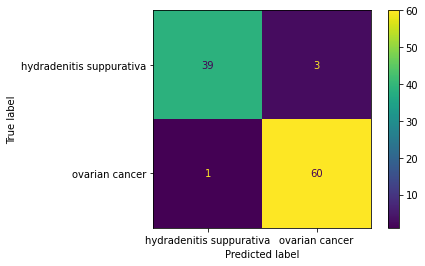

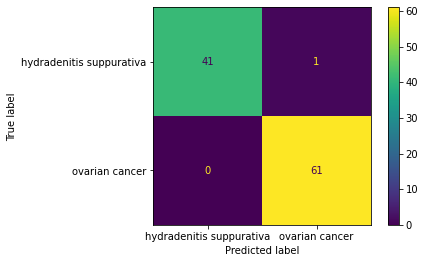

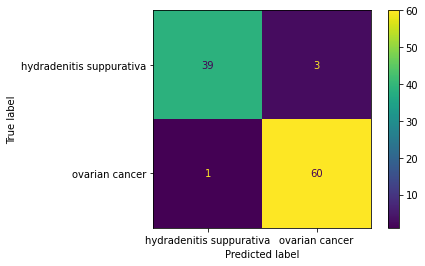

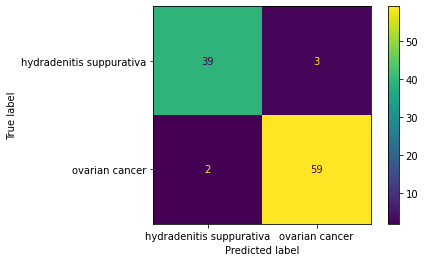

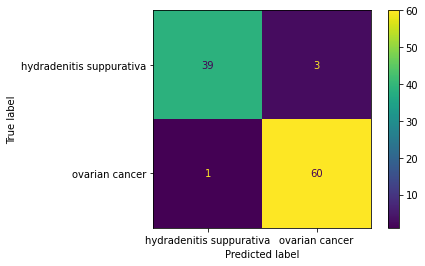

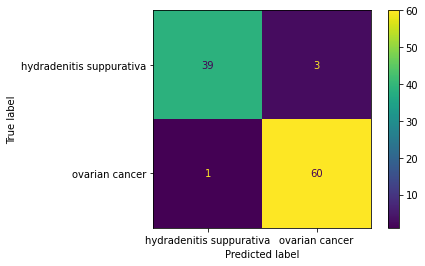

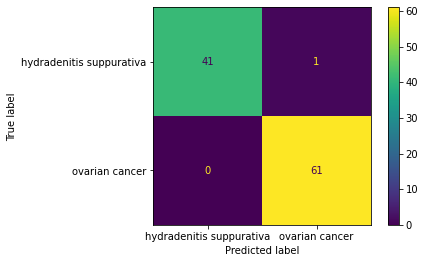

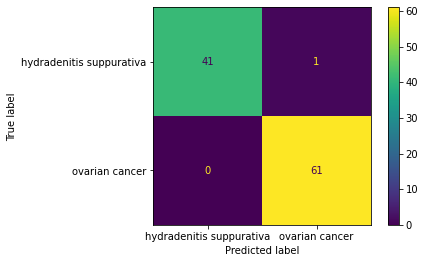

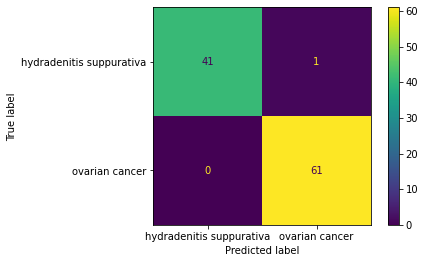

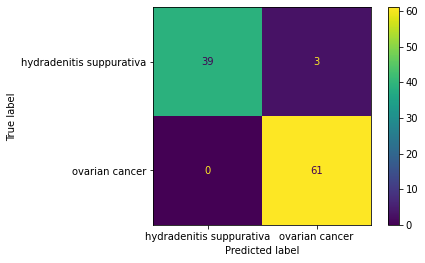

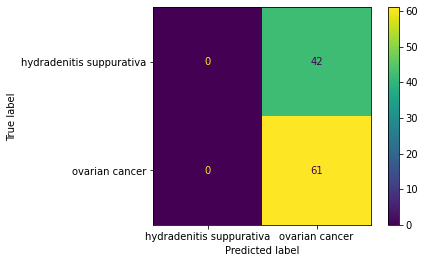

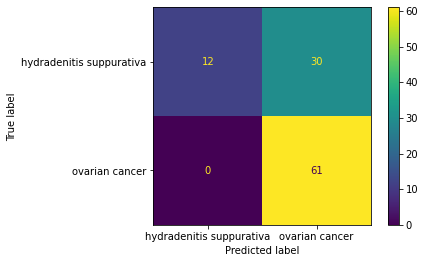

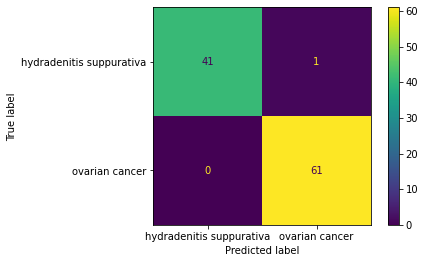

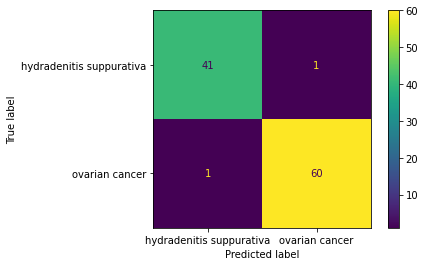

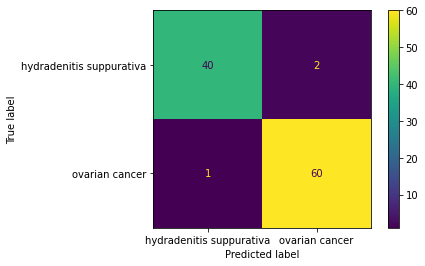

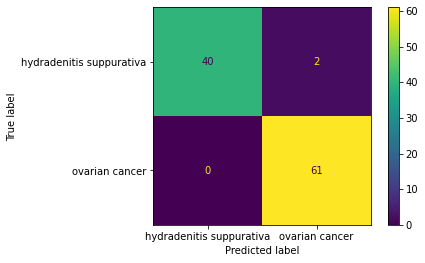

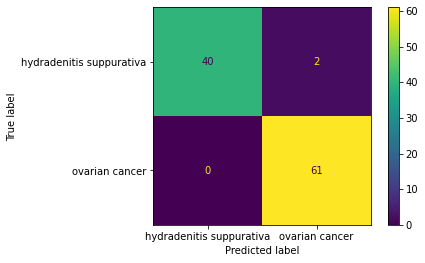

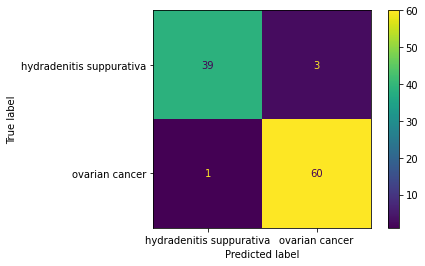

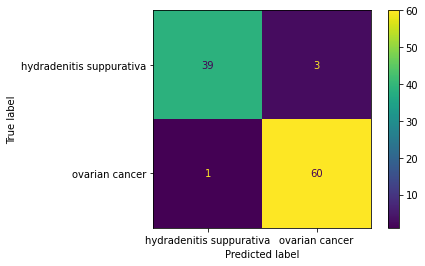

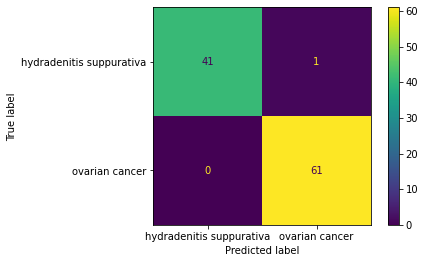

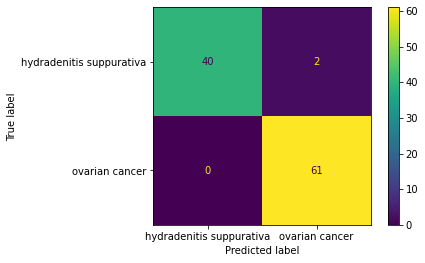

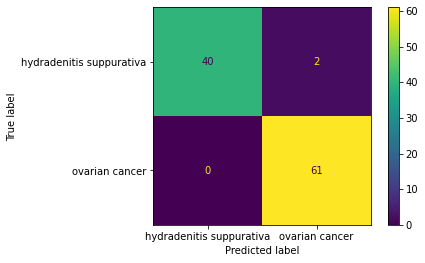

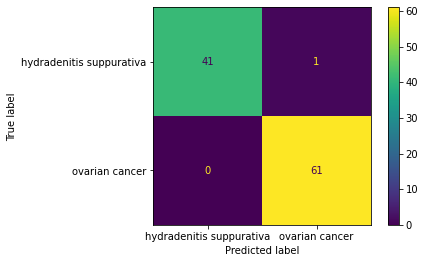

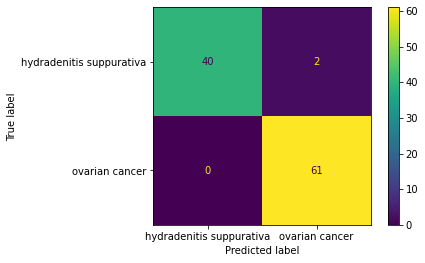

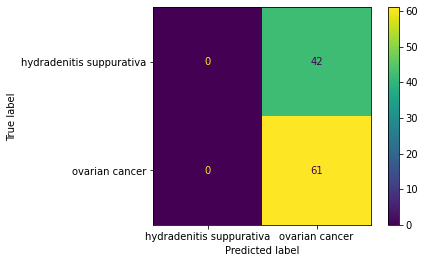

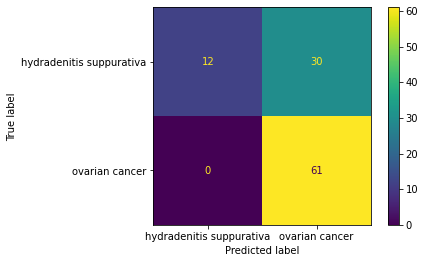

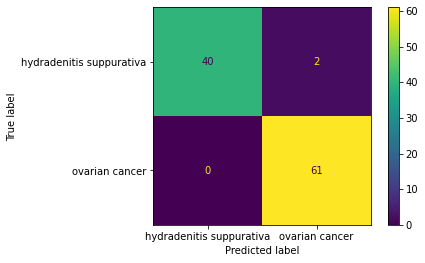

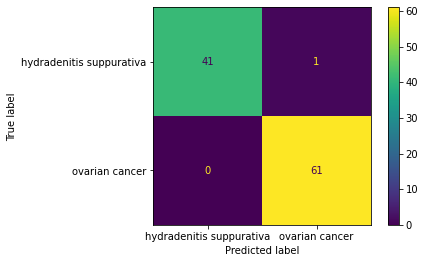

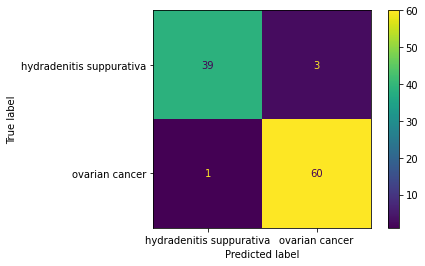

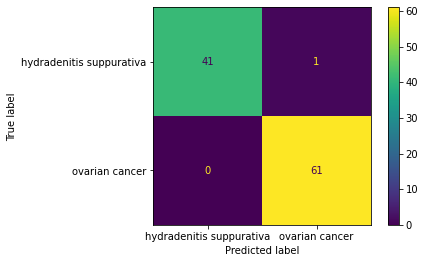

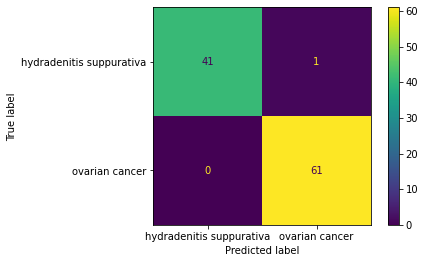

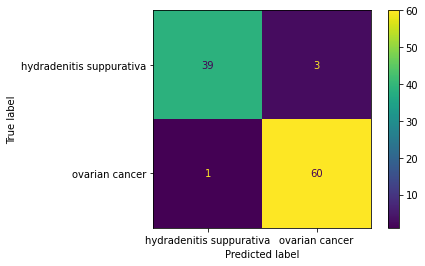

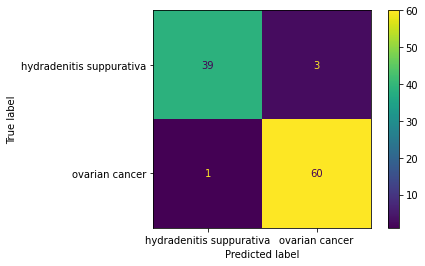

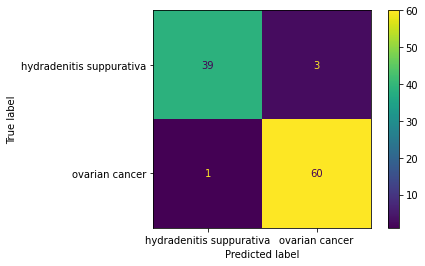

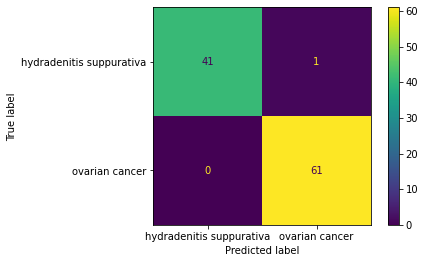

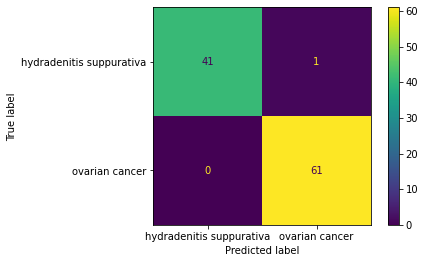

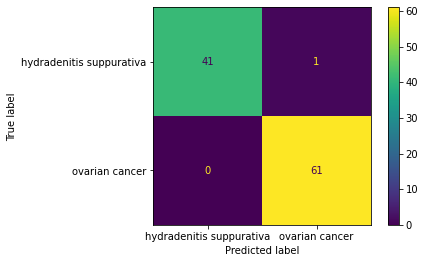

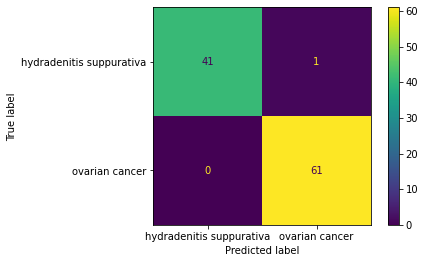

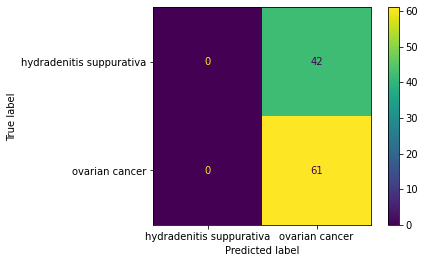

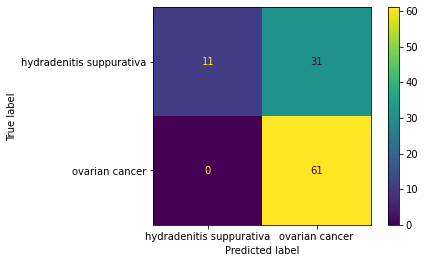

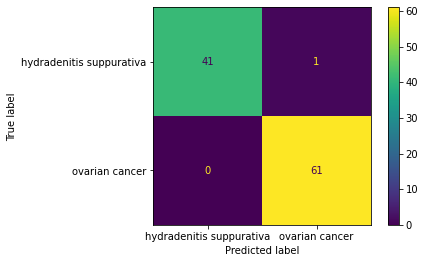

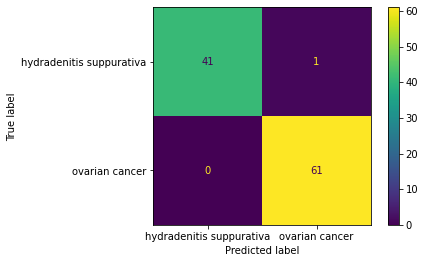

In [ ]:
for index, row in new_model_results_df.iterrows():
  row['conf matrices display'].plot()

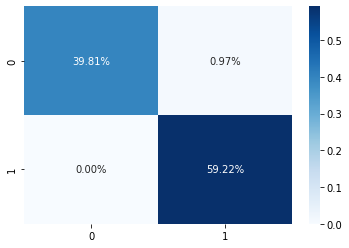

In [ ]:
cm = new_model_results_df['conf matrices'][1]
sns.heatmap(cm/np.sum(cm),annot = True, fmt='.2%', cmap='Blues')

In [ ]:
new_model_results_df.iloc[: , :8].sort_values(by='best accuracy test', ascending=False)

,term type,model,measure,max measure,max features,best params,best accuracy train,best accuracy test
41,3 - word,MLPClassifier(),accuracy,0.864078,1000,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",0.9773,0.9903
19,2 - word,"(DecisionTreeClassifier(max_features='auto', r...",accuracy,0.834951,4000,"{'criterion': 'entropy', 'max_depth': 50, 'max...",0.9773,0.9903
1,1 - word,LogisticRegression(),accuracy,0.825243,1000,"{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 's...",0.9676,0.9903
22,2 - word,([DecisionTreeRegressor(criterion='friedman_ms...,accuracy,0.737864,3000,"{'learning_rate': 0.1, 'loss': 'exponential', ...",0.9773,0.9903
27,2 - word,MLPClassifier(),accuracy,0.873786,8000,"{'activation': 'logistic', 'alpha': 0.001, 'ea...",0.9773,0.9903
12,1 - word,"VotingClassifier(estimators=[('LR', LogisticRe...",accuracy,0.815534,1000,"{'n_jobs': -1, 'voting': 'hard'}",0.9709,0.9903
29,3 - word,LogisticRegression(),accuracy,0.834951,1000,"{'C': 10, 'max_iter': 1000, 'penalty': 'l2', '...",0.9773,0.9903
30,3 - word,MultinomialNB(),accuracy,0.815534,1000,"{'alpha': 1, 'fit_prior': True}",0.9644,0.9903
34,3 - word,"(SVC(random_state=530396881), SVC(random_state...",accuracy,0.844660,2000,"{'max_features': 0.5, 'max_samples': 0.7, 'n_e...",0.9741,0.9903
8,1 - word,([DecisionTreeRegressor(criterion='friedman_ms...,accuracy,0.757282,3000,"{'learning_rate': 0.1, 'loss': 'deviance', 'ma...",0.9773,0.9903


In [ ]:
from io import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus
pydotplus_installed = True

dt = new_model_results_df['model'][4]

# Create an output destination for the file
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print(graph)
# View the tree image
filename = 'wine_tree.png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
t2 = time.perf_counter()
print('Seconds taken to run:', round(t2-t1, 0))
print('Minutes taken to run:', round((t2-t1)/60, 0))
print('Hours taken to run:', round((t2-t1)/3600, 2))

Seconds taken to run: 1429.0
Minutes taken to run: 24.0
Hours taken to run: 0.4


## **Conclusions**:

Feature Selection:
*   Most of the models did well with not more than 3000 features. and even mainly 500-1000.
*   Best model - MLP. also different Bagging models and regular LR.
*   Worse model - MNB, Stacking.
*   Max accuracy - 87%.

Parameter Tuning:

*   Best model is still MLP. but now also LR, RF GradientBoosting improved a lot.
*   Stacking + MNB really improved.
*   Many top models with underfitting.
*   RF with big (10%) overfitting.
*   Max accuracy - 99%.
*   SVM - best with rbf kernel, degree 1.
*   MLP - best with big 100 hiden layers and logistic activation func.
*   LR - with l2 regularization.
*   Boosting - with many estimators (200).


**Generally - the tf-idf method with classic ML methods is very good for this kind of missions and get great accuracy - many around 99%.**




